# üìä Ocena Modelu ‚Äî z wykresami!

Ten notebook pokazuje jak oceniamy modele:
- Regresji (czy przewidzia≈Ç dobrze liczbƒô?)
- Klasyfikacji (czy zgad≈Ç poprawnie klasƒô?)

U≈ºywamy gotowych funkcji z `sklearn.metrics`.

## üìà 1. Ocena modelu regresji

### ‚ÑπÔ∏è Metryki regresji:

- **MSE (Mean Squared Error)** ‚Äì ≈õrednia z kwadrat√≥w r√≥≈ºnicy miƒôdzy warto≈õciƒÖ prawdziwƒÖ a przewidywanƒÖ.
  - Wz√≥r (dla ciekawych):  
    `MSE = (1/n) * Œ£(y_true - y_pred)^2`
  - ‚ûï Im **mniejsza**, tym lepiej.

- **R¬≤ (R-kwadrat)** ‚Äì m√≥wi, jak dobrze model t≈Çumaczy dane:
  - `R¬≤ = 1` ‚Äî idealne dopasowanie,
  - `R¬≤ = 0` ‚Äî model nic nie t≈Çumaczy (tak jakby zawsze zgadywa≈Ç ≈õredniƒÖ),
  - `R¬≤ < 0` ‚Äî model gorzej ni≈º zgadywanie ≈õredniej.

### üîß Przyk≈Çad: przewidywanie ceny mieszkania

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_true = np.array([200, 250, 300, 350])
y_pred = np.array([190, 260, 310, 340])

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"≈öredni b≈ÇƒÖd kwadratowy (MSE): {mse:.2f}")
print(f"Dopasowanie modelu (R¬≤): {r2:.2f}")


≈öredni b≈ÇƒÖd kwadratowy (MSE): 100.00
Dopasowanie modelu (R¬≤): 0.97


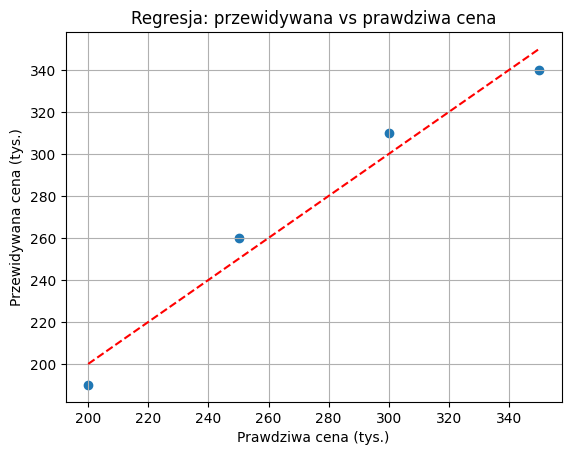

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("Prawdziwa cena (tys.)")
plt.ylabel("Przewidywana cena (tys.)")
plt.title("Regresja: przewidywana vs prawdziwa cena")
plt.grid(True)
plt.show()

## ‚úÖ 2. Ocena modelu klasyfikacji

### ‚ÑπÔ∏è Metryki klasyfikacji:

- **Accuracy** ‚Äì jaki % odpowiedzi model trafi≈Ç.
- **Precision** ‚Äì z tych, kt√≥re model uzna≈Ç za pozytywne, ile naprawdƒô nimi by≈Ço?
- **Recall** ‚Äì z prawdziwych pozytywnych przypadk√≥w, ile model wykry≈Ç?
- **F1-score** ‚Äì po≈ÇƒÖczenie Precision i Recall (≈õrednia harmoniczna).
  - Przydatne, gdy dane sƒÖ niezbalansowane.

- **Macierz pomy≈Çek** ‚Äì tabela pokazujƒÖca:
  - gdzie model mia≈Ç racjƒô,
  - gdzie siƒô pomyli≈Ç (np. myli≈Ç niezdajƒÖcych ze zdajƒÖcymi).

### üéØ Przyk≈Çad: czy kto≈õ zda egzamin?

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1:", f1_score(y_true, y_pred))
print("Macierz pomy≈Çek:")
print(confusion_matrix(y_true, y_pred))


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1: 0.75
Macierz pomy≈Çek:
[[3 1]
 [1 3]]


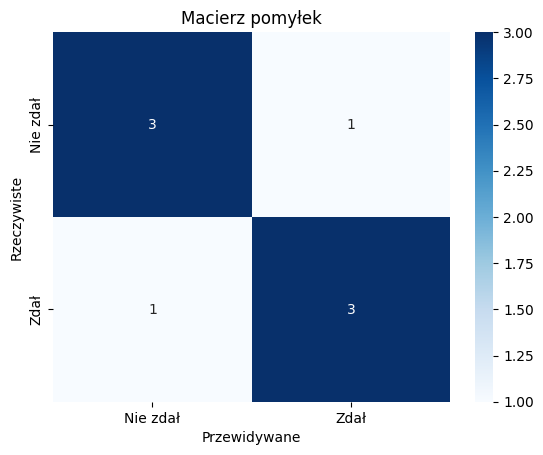

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nie zda≈Ç', 'Zda≈Ç'], yticklabels=['Nie zda≈Ç', 'Zda≈Ç'])
plt.xlabel("Przewidywane")
plt.ylabel("Rzeczywiste")
plt.title("Macierz pomy≈Çek")
plt.show()

üìä Przyk≈Çad: czemu warto patrzyƒá na wiele metryk a nie tylko jednƒÖ

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generujemy dane
y_true = [0] * 90 + [1] * 10  # 90 os√≥b niezda≈Ço, 10 zda≈Ço
y_pred = [0] * 100  # Model przewidzia≈Ç, ≈ºe wszyscy niezdali

# Obliczamy metryki
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Wypisujemy wyniki
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
